In [1]:
import tensorflow as tf

C:\Users\users\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\users\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\users\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\users\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of 

In [2]:
tf. __version__

'1.14.0'

In [3]:
(x_train_all,y_train_all),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [4]:
print(x_train_all.shape,y_train_all.shape)

(60000, 28, 28) (60000,)


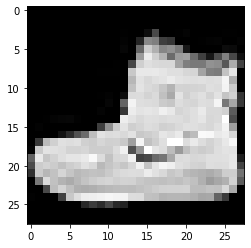

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train_all[0],cmap='gray')
plt.show()

In [6]:
print(y_train_all[:10])

[9 0 0 3 0 2 7 2 5 5]


In [7]:
import numpy as np
np.bincount(y_train_all)


array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train_all,y_train_all,stratify=y_train_all,test_size=0.2,random_state=42)

In [9]:
print(np.bincount(y_train))
np.bincount(y_val)


[4800 4800 4800 4800 4800 4800 4800 4800 4800 4800]


array([1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200],
      dtype=int64)

In [10]:
x_train=x_train/255
x_val=x_val/255

In [12]:
x_train=x_train.reshape(-1,784)
x_val=x_val.reshape(-1,784)
print(x_train.shape,x_val.shape)

(48000, 784) (12000, 784)


In [14]:
a=[5,10,100]
for i in range(97):
    a.append(4)
print(a)
tf.keras.utils.to_categorical(a)

[5, 10, 100, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
tf.keras.utils.to_categorical([0,1,3])

In [14]:
y_train_encoded=tf.keras.utils.to_categorical(y_train)
y_val_encoded=tf.keras.utils.to_categorical(y_val)

In [15]:
y_train_encoded.shape,y_val_encoded.shape

((48000, 10), (12000, 10))

In [16]:
print(y_train[0],y_train_encoded[0])

6 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [17]:
class MCN():
    def __init__(self, units=10,batch_size=32,learning_rate=0.1, l1=0, l2=0):       
        self.units=units # 은닉층 뉴런 개수
        self.w1=None #은닉층 가중치
        self.b1=None #은닉층 절편
        self.w2=None #출력층 가중치
        self.b2=None #출력층 절편
        self.a1=None #은닉층 활성화 출력 
        self.batch_size=batch_size
        self.losses=[] 
        self.val_losses=[]
        self.lr=learning_rate
        self.l1=l1
        self.l2=l2
    def sigmoid(self,z):
        a=1/(1+np.exp(-z))
        return a
    def softmax(self,z):
        exp_z=np.exp(z)
        return exp_z/np.sum(exp_z, axis=1).reshape(-1,1)
    def forpass(self,x): 
        z1=np.dot(x,self.w1)+self.b1 
        self.a1=self.sigmoid(z1) #activation->sigmoid
        z2=np.dot(self.a1,self.w2)+self.b2 
        return z2
    def backprop(self,x,err):
        m=len(x)
        w2_grad=np.dot(self.a1.T,err)/m 
        b2_grad=np.sum(err)/m 
        err_to_hidden=np.dot(err,self.w2.T)*self.a1*(1-self.a1)
        w1_grad=np.dot(x.T,err_to_hidden)/m 
        b1_grad=np.sum(err_to_hidden,axis=0)/m 
        return w1_grad, b1_grad ,w2_grad, b2_grad
    def init_weights(self,n_features,n_classes):
        self.w1=np.random.normal(0,1,(n_features,self.units))
        self.b1=np.zeros(self.units)
        self.w2=np.random.normal(0,1,(self.units, n_classes)) #w2,b2행렬크기 달라짐-> 출력층의 갯수만큼으로 조정
        self.b2=np.zeros(n_classes)
    def fit(self,x,y,epochs=100,x_val=None, y_val=None):
        #y=y.reshape(-1,1) -> y가 다중 분류이므로 이미 2차원 배열 
        #y_val=y_val.reshape(-1,1)-> y가 다중 분류이므로 이미 2차원 배열
        np.random.seed(42)
        self.init_weights(x.shape[1],y.shape[1])
        for i in range (epochs):
            loss=0
            print('.',end='')
            for x_batch, y_batch in self.gen_batch(x,y):
                a=self.training(x_batch,y_batch)
                a=np.clip(a, 1e-10, 1-1e-10)
                loss+=np.sum(-y_batch*np.log(a))# loss function변화 
            self.losses.append((loss+self.reg_loss())/len(x))
            self.update_val_loss(x_val,y_val)
    def gen_batch(self,x,y):
        length=len(x)
        bins=length//self.batch_size
        if length % self.batch_size:
            bins+=1
        indexes=np.random.permutation(np.arange(len(x)))
        x=x[indexes]
        y=y[indexes]
        for i in range(bins):
            start=self.batch_size*i
            end=self.batch_size*(i+1)
            yield x[start:end], y[start:end]
    def training(self,x,y):
        m=len(x)
        z=self.forpass(x) 
        a=self.softmax(z) #activation function 변화->softmax
        err=-(y-a) # 오차계산 
        w1_grad, b1_grad, w2_grad, b2_grad=self.backprop(x,err) 
        w1_grad+=(self.l1*np.sign(self.w1)+self.l2*self.w1)/m
        w2_grad+=(self.l1*np.sign(self.w2)+self.l2*self.w2)/m
        self.w1-=self.lr*w1_grad 
        self.b1-=self.lr*b1_grad 
        self.w2-=self.lr*w2_grad 
        self.b2-=self.lr*b2_grad 
        return a
    def update_val_loss(self,x_val, y_val):
        z=self.forpass(x_val) #정방형 계산
        a=self.softmax(z)#activation function 변화->softmax
        a=np.clip(a, 1e-10, 1-1e-10)
        val_loss=np.sum(-y_val*np.log(a)) # loss function변화
        self.val_losses.append((val_loss+self.reg_loss())/len(y_val))
    def reg_loss(self):
        return self.l1*(np.sum(np.abs(self.w1))+np.sum(np.abs(self.w2)))+\
                self.l2/2*(np.sum(self.w1**2)+np.sum(self.w2**2))
    def predict(self, x):
        z=self.forpass(x)
        return np.argmax(z,axis=1)
    def score(self, x, y):
        return np.mean(self.predict(x)==np.argmax(y,axis=1))

In [20]:
fc=MCN(units=100,batch_size=256)
fc.fit(x_train,y_train_encoded,x_val=x_val,y_val=y_val_encoded,epochs=40)

........................................

0.8150833333333334


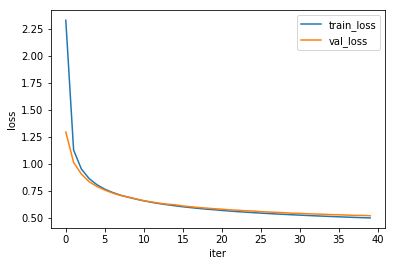

In [21]:
print(fc.score(x_val,y_val_encoded))
plt.plot(fc.losses)
plt.plot(fc.val_losses)
plt.ylabel('loss')
plt.xlabel('iter')
plt.legend(['train_loss','val_loss'])
plt.show()


In [24]:
w=tf.Variable(tf.zeros(shape=(1)))
b=tf.Variable(tf.zeros(shape=(1)))
optimizer=tf.optimizers.SGD(lr=0.01)
num_epochs=10
for step in range(num_epochs):
    with tf.GradientTape()as tape:
        z_net=w*x_train+b
        z_net=tf.reshape(z_net,[-1])
        sqr_errors=tf.square(y_train-z_net)
        mean_cost=tf.reduce_mean(sqr_errors)
        grads=tape.gradient(mean_cost,[w,b])
        optimizer.apply_gradients(zip(grads,[w,b]))

InvalidArgumentError: Incompatible shapes: [48000] vs. [37632000] [Op:Sub] name: sub/

In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model=Sequential()

In [26]:
model.add(Dense(100,activation='sigmoid',input_shape=(784,)))
model.add(Dense(10,activation='softmax'))

In [27]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
history=model.fit(x_train,y_train_encoded,epochs=40,validation_data=(x_val,y_val_encoded))

Train on 48000 samples, validate on 12000 samples
Epoch 1/40
48000/48000 [==============================] - 7s 140us/sample - loss: 1.3844 - accuracy: 0.6420 - val_loss: 0.9640 - val_accuracy: 0.7319
Epoch 2/40
48000/48000 [==============================] - 5s 112us/sample - loss: 0.8433 - accuracy: 0.7438 - val_loss: 0.7504 - val_accuracy: 0.7583
Epoch 3/40
48000/48000 [==============================] - 5s 112us/sample - loss: 0.7116 - accuracy: 0.7634 - val_loss: 0.6649 - val_accuracy: 0.7760
Epoch 4/40
48000/48000 [==============================] - 6s 116us/sample - loss: 0.6471 - accuracy: 0.7793 - val_loss: 0.6129 - val_accuracy: 0.7913
Epoch 5/40
48000/48000 [==============================] - 5s 111us/sample - loss: 0.6054 - accuracy: 0.7921 - val_loss: 0.5788 - val_accuracy: 0.7999
Epoch 6/40
48000/48000 [==============================] - 5s 110us/sample - loss: 0.5751 - accuracy: 0.8029 - val_loss: 0.5520 - val_accuracy: 0.8094
Epoch 7/40
48000/48000 [==========================

In [29]:
print(history.history.keys)

<built-in method keys of dict object at 0x00000239A4109480>


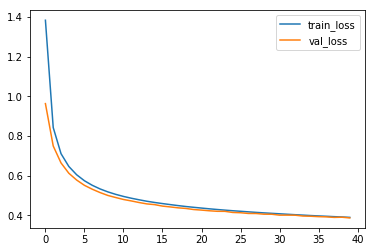

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_loss','val_loss'])
plt.show()


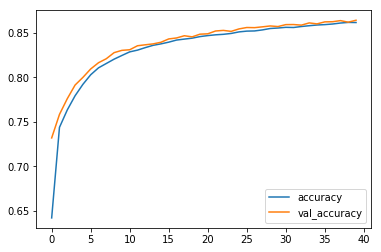

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.show()

In [34]:
loss,accuracy=model.evaluate(x_val,y_val_encoded,verbose=0)
print(accuracy)


0.8641667
